In [1]:
from keras.datasets import reuters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=1000, test_split=0.2) # 가장 많이 쓰여진 단어 1000개

In [3]:
len(x_train) # 뉴스 데이터 개수

8982

In [4]:
len(x_train[0]) # 첫번째 뉴스데이터의 길이(구의 개수)

87

In [5]:
len(x_train[1]) 

56

In [6]:
x_train  # texts_to_sequences 데이터로 구성되어 있음 -> 각자 길이는 다르니까 패딩작업은 필요함

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [7]:
category = max(y_train) + 1 
category

46

In [8]:
y_train_pd = pd.DataFrame(y_train) # x인줄 알았는데 y네..!?..
y_train_pd[0].value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
36      49
12      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
29      19
37      19
38      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
Name: 0, dtype: int64

# 8982의 뉴스데이터를 46가지의 카테고리로 매칭하는 모델

In [9]:
# 패딩시키기
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [10]:
x_train = pad_sequences(x_train, maxlen=100, padding='pre') # 너무 긴게 있을수도 있으니 maxlen 사용
x_test = pad_sequences(x_test, maxlen=100, padding='pre')

In [11]:
print(x_train.shape)
print(x_test.shape)

(8982, 100)
(2246, 100)


In [12]:
y_train[0]

3

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape

(8982, 46)

In [16]:
y_train[0] # 3임

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 질문) 
1) lstm,시계열 이런 키워드가 나왔는데 자연어처리랑 무슨 관련이 있는지? 막연히 최신 댓글이 더 영향력이 커서 그렇게 설명하신건가?
아니면 input shape 필요없는거때문에 편리해서 쓰는건가?
2) 종속변수도 임베딩으로 벡터화 시키면 안되나요..?!
3) 로이터에서 pad_sequences 길이대로 임배딩 시키는게 제일 적합하다고 생각했는데 100이 아닌 1000으로 지정한 이유?

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, Conv1D

In [18]:
model = Sequential()
# model.add(Embedding(1000, 100, input_length=100)) 
model.add(Embedding(100, 100))
model.add(LSTM(64))
model.add(Dense(128))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         10000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 66,494
Trainable params: 66,494
Non-trainable params: 0
_________________________________________________________________


# 학습

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=200, validation_split=0.2)
acc = model.evaluate(x_test,y_test)[1]
print('acc :',acc)

C:\Users\bitcamp\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7185 samples, validate on 1797 samples
Epoch 1/100
7185/7185 [==============================] - 3s 424us/step - loss: 1.2939 - acc: 0.6686 - val_loss: 1.4237 - val_acc: 0.6422
Epoch 2/100
7185/7185 [==============================] - 3s 379us/step - loss: 1.2523 - acc: 0.6789 - val_loss: 1.4660 - val_acc: 0.6322
Epoch 3/100
7185/7185 [==============================] - 3s 379us/step - loss: 1.2428 - acc: 0.6788 - val_loss: 1.4410 - val_acc: 0.6528
Epoch 4/100
7185/7185 [==============================] - 3s 377us/step - loss: 1.2379 - acc: 0.6804 - val_loss: 1.4297 - val_acc: 0.6511
Epoch 5/100
7185/7185 [==============================] - 3s 384us/step - loss: 1.2213 - acc: 0.6859 - val_loss: 1.4276 - val_acc: 0.6528
Epoch 6/100
7185/7185 [==============================] - 3s 376us/step - loss: 1.2206 - acc: 0.6857 - val_loss: 1.4466 - val_acc: 0.6522
Epoch 7/100
7185/7185 [==============================] - 3s 375us/step - loss: 1.2258 - acc: 0.6820 - val_loss: 1.4751 - val_acc: 

KeyboardInterrupt: 

## 그래프로 학습곡선 확인

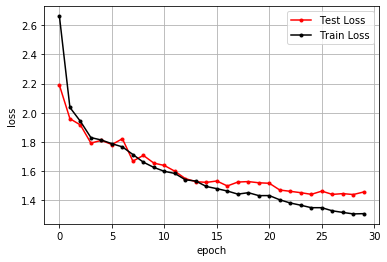

In [22]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

plt.plot(y_val_loss, marker='.', c='red', label='Test Loss')
plt.plot(y_loss, marker='.', c='black', label='Train Loss')
plt.legend(loc='upper right')
plt.grid();plt.xlabel('epoch');plt.ylabel('loss');plt.show()